In [ ]:
import ast
import pandas as pd
import seaborn as sns

from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_posted_skill']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

import ast


df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
df_DA_india = df[(df['job_country']== 'United States')& (df['job_title_short']=='Data Analyst')].copy()

In [ ]:
df_DA_india=df_DA_india.dropna(subset=['salary_year_avg'])

df_DA_india_exploded=df_DA_india.explode('job_skills')
df_DA_india_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [ ]:
df_DA_skills= df_DA_india_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills =df_DA_skills.rename(columns={'count':'skill_count' , 'median':'median_salary'})
DA_job_count =len(df_DA_india)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count*100

skill_limit = 5

df_DA_skills_high_demand =df_DA_skills[df_DA_skills['skill_percent']> skill_limit]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


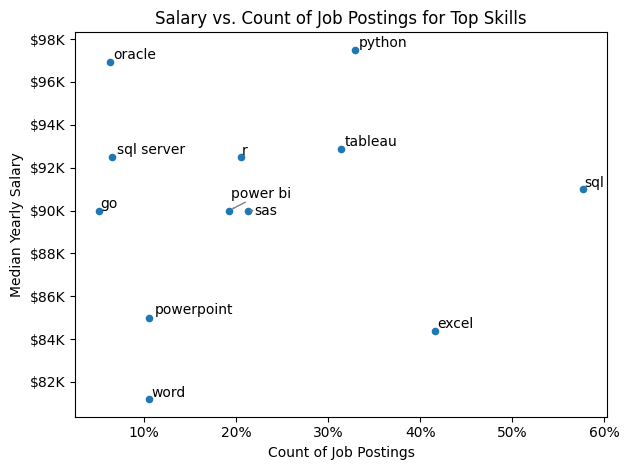

In [ ]:
!pip install adjustText
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top Skills')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df['job_type_skills'].head(10)

,job_type_skills
0,None
1,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,"{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,"{'cloud': ['gcp'], 'programming': ['python', '..."
6,"{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,"{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,"{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [ ]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ssis',
  'alteryx',
  'microstrategy',
  'msaccess',
  'esquisse',
  'spreadsheet',
  'nuix',
  'dax',
  'outlook',
  'power bi',
  'datarobot',
  'powerbi',
  'splunk',
  'sharepoint',
  'visio',
  'tableau',
  'qlik',
  'cognos',
  'sheets',
  'word',
  'spss',
  'ssrs',
  'sap',
  'powerpoint',
  'ms access',
  'looker',
  'excel',
  'sas'],
 'programming': ['sass',
  'c#',
  'html',
  'powershell',
  'visual basic',
  'dart',
  'nosql',
  'shell',
  'css',
  't-sql',
  'cobol',
  'ocaml',
  'solidity',
  'lua',
  'objective-c',
  'javascript',
  'rust',
  'sql',
  'mongodb',
  'elixir',
  'matlab',
  'vb.net',
  'go',
  'bash',
  'haskell',
  'lisp',
  'delphi',
  'r',
  'python',
  'swift',
  'crystal',
  'java',
  'visualbasic',
  'typescript',
  'golang',
  'mongo',
  'kotlin',
  'c++',
  'apl',
  'vba',
  'erlang',
  'c',
  'julia',
  'no-sql',
  'assembly',
  'fortran',
  'clojure',
  'perl',
  'pascal',
  'php',
  'groovy',
  'ruby',
  'sas',
  'f#',
  'sc

In [ ]:
df_technology= pd.DataFrame(list(technology_dict.items()),columns=['technology', 'skills'])

df_technology=df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,ssis
0,analyst_tools,alteryx
0,analyst_tools,microstrategy
0,analyst_tools,msaccess
0,analyst_tools,esquisse
...,...,...
9,sync,webex
9,sync,zoom
9,sync,ringcentral
9,sync,mattermost


In [ ]:
df_plot = df_DA_skills_high_demand.merge(df_technology,left_on ='job_skills' ,right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


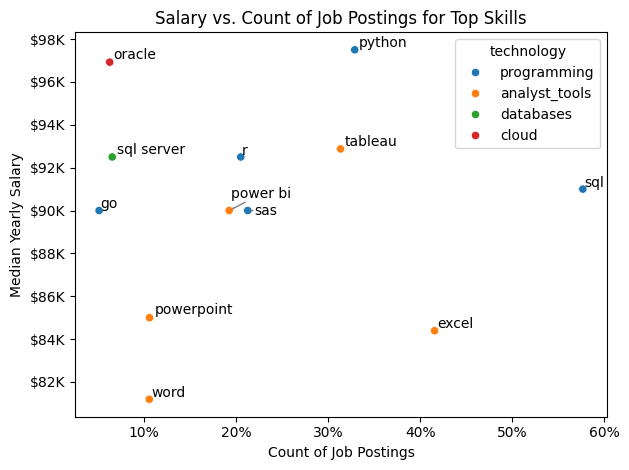

In [ ]:
!pip install adjustText
from adjustText import adjust_text

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',

)
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top Skills')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()